In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
sales_train = pd.read_csv('sales_train.csv')
sales_test  = pd.read_csv('sales_test.csv')


In [3]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


During analysis, only 2 variables had missing values : Item_Weight - 1463 , Outlet_Size - 2410

categorical columns : Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type,  Outlet_Establishment_Year

In [4]:
outlet_sales = sales_train['Item_Outlet_Sales']

In [5]:
def change_fat(content):
    if content in ['LF','low fat','Low Fat']:
        return 'Low Fat'
    elif content in ['reg','Regular']:
        return 'Regular'
    
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].apply(change_fat)


In [6]:
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']

# Variable Analysis
- Examine continous variables
- Examine categorical variables
- Examine relationships with predicted sales values
- Examine relationships between variables

In [7]:
continous_columns = [var  for var in list(sales_train.columns) if var not in categorical_columns]
continous_columns.remove('Item_Identifier')
continous_columns.remove('Outlet_Identifier')
continous_columns.remove('Item_Outlet_Sales')

# Examining relationship between variables and Item_Outlet_Sales.
it was noticed that all the continous variables in the dataset are properties of the items being sold and all categorical variables are mostly store properties.
First, we try to figure out what causes an increased in product sales.

Second, we then consider what makes the same product in sell more in the different stores.

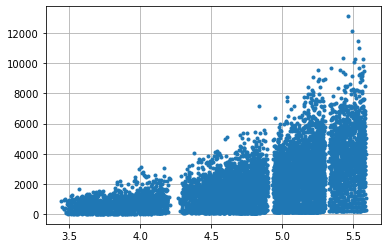

In [8]:
plt.plot(np.log(sales_train['Item_MRP']),outlet_sales,'.')
plt.grid(True)
plt.show()


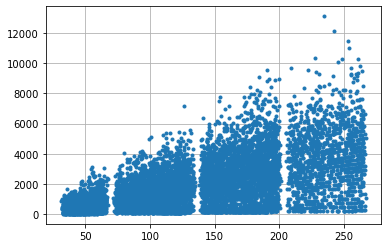

In [9]:
plt.plot(sales_train['Item_MRP'],outlet_sales,'.')
plt.grid(True)
plt.show()

In [10]:
from ipywidgets import interact
product = sales_train.groupby('Item_Identifier')
sales = product['Item_Outlet_Sales'].mean()
product_features = pd.DataFrame([product[column].mean() for column in continous_columns]).T
product_features['sales'] = sales


In [13]:
@interact
def plot_items_props( column=continous_columns):        
    plt.plot(sales_train[column],outlet_sales,'.',label=column)
    plt.xlabel(column)
    plt.ylabel('Item_Sales')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
#plot_items_props('Item_Weight')

interactive(children=(Dropdown(description='column', options=('Item_Weight', 'Item_Visibility', 'Item_MRP'), v…

items with sales above 4000 were in the range of 7.5 - 17.5 weight . However, most items sold below 4000 and above were well distributed among weights.
most items had below 0.15 visibility in the stores. very few items with visibility above 0.15 had sales greater than 4000 while items
with mean visibility less than 0.15 sold above 4000 , even more concentrated below 0.10. However, the data points are mostly concentrated below 4000, perhaps this isnt a strong determinant.
For MRP in general, it was directly proportional to sales. MRP is an important feature perhaps.
what was responsible for this?

therefore, most of the items that sold above 4000 had high mean MRP, less than 0.1 mean visibility and weighed between 7.5 - 17.5.

In [14]:
@interact
def count(column= categorical_columns):
    print(sales_train.groupby(column)['Item_Outlet_Sales'].count(),sales_train.groupby(column)['Item_Outlet_Sales'].max())
    print(sales_train[sales_train['Item_Outlet_Sales'] > 6000].groupby(column)['Item_Outlet_Sales'].count())

interactive(children=(Dropdown(description='column', options=('Item_Fat_Content', 'Item_Type', 'Outlet_Size', …

Products with low fat had more sales, had a higher max sales, and even more sales of items above the median sales. It is a valuable variable. 

Fruits and vegetables ,snack foods, household had more recorded sales than the rest of the item groups. household holds the item with the maximum sales, followed by fruits and vegetables and then snacks. Snack foods , fruits and vegetables , household have the most items above the median sales.

## outlet size 
Medium had the highest recorded list of sales,followed by small and then high. maximum sale recorded was from the medium store, followed by high and then small. amount of items selling above median sales was from medium, small and high. 

## Outlet_location
Item with Maximum sale came from tier 3 followed by 1,2. 3,2,1 in terms of amount of items performing above median sales.

## Outlet_type 
type 1, grocery, 3, 2 in terms of number of items. supermarket 1 had the highest amount of items performing above median sales followed by 3, 2. None from Grocery.

## Outlet_establishment
In general, there was a decline in the amount of items performing above median sales.

Possible order of importance :item_fat_content,outlet_type,outlet_size,outlet_location,,item_type, establishment_year

#### Certain type of items were associated with high sales. It make sense to divide these items into 4 major categories.
- fruits,snacks,household, frozen   
- dairy,baking , canned, health
- soft drinks,meat,bread, hard drinks,others,starchy food, sea food

##### For the item properties , order of importance will be : mrp > item_visibility > item_weight.

# Examining continous variables.


In [15]:
sales_train[continous_columns].describe()

,Item_Weight,Item_Visibility,Item_MRP
count,7060.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782
std,4.643456,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,8.773750,0.026989,93.826500
50%,12.600000,0.053931,143.012800
75%,16.850000,0.094585,185.643700
max,21.350000,0.328391,266.888400


# Examining categorical variables.

In [16]:
@interact
def describe(column=categorical_columns):
    table  = pd.crosstab(index=sales_train[column],columns = 'count', normalize = True, margins=True)
    return table

interactive(children=(Dropdown(description='column', options=('Item_Fat_Content', 'Item_Type', 'Outlet_Size', …

Almost half (45%)the shops were of medium size followed by small. 39% of the shops weere tier 3. 65% of the shop were a type 1 supermarket. 64% of the items were low fat.

# Examining relationships between the various variables.

In [17]:
@interact 
def rel(x= continous_columns, y = continous_columns):
    print(sales_train[x].corr(sales_train[y]))
    plt.plot(sales_train[x],sales_train[y],'.')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

interactive(children=(Dropdown(description='x', options=('Item_Weight', 'Item_Visibility', 'Item_MRP'), value=…

There is no relationship between continous variables.

In [18]:
@interact
def cross_table(row= categorical_columns, col=categorical_columns):
    table= pd.crosstab(sales_train[row],columns=sales_train[col],margins=True, normalize = True)
    return table

interactive(children=(Dropdown(description='row', options=('Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Ou…

There is some relationship between outlet_location and outlet_size as tier 3 was the only location for large outlet sizes and there was a decrease from high to small . However for 1 and 2, there was an increase in the fraction of shops from high to small.
Tier 3 had outlet types spread out almost evenly through the different supermarkets. 1 and 2 had on type 1 stores alone basically.
All of the Tier 1 shops are old (1985 - 1999). Tier 2 starts from 2002. Tier 3 shops are mostly old.
All large shops are type 1 supermarkets but was almost the same for the small shops. The relationship isnt really strong.
grocery and type 3 stores were relatively older than type 1 and  2.

# Examining Relationships between categorical and continous properties.
I shall assume that all continous variables arent related to the categorical since most categorical variables were properties pertaining to the stores. However, there might be some relationship between the MRP and location of store or supermarket type.

# Inference.
If i wanted to increase sales i will target products with higher MRP, low in fat, sold in medium sized,type 1 stores located in a tier 3 location.


# Dealing with null values.
Only two features have null values : outlet_size and item weight.
since these items and stores have identifiers i shall attempt to fill up the empty spaces according to their identifiers.


In [19]:
item_weight = {}
outlet_size = {}

def retrieve(row):
    item =  row['Item_Identifier'] 
    outlet = row['Outlet_Identifier'] 
    if item in item_weight.keys() and pd.isna(item_weight[item]):
        item_weight[item] = row['Item_Weight']
        
    if outlet in outlet_size.keys() and pd.isna(outlet_size[outlet]):
        outlet_size[outlet] = row['Outlet_Size'] 
        
    if item not in item_weight.keys():
        item_weight[item] = row['Item_Weight']
        
    if outlet not in outlet_size.keys():
        outlet_size[outlet] = row['Outlet_Size']
        
def fillnull(row):
    item =  row['Item_Identifier'] 
    outlet = row['Outlet_Identifier']
    if pd.isna(row['Item_Weight']) and item in item_weight.keys():
        row['Item_Weight'] = item_weight[item]
    if pd.isna(row['Outlet_Size']) and row['Outlet_Type'] == 'Grocery Store':
        row['Outlet_Size'] = 'Small'
    elif pd.isna(row['Outlet_Size']) and (row['Outlet_Type'] == 'Supermarket Type2' or row['Outlet_Type']=='Supermarket Type3'):
        row['Outlet_Size'] = 'Medium'
    else:
        row['Outlet_Size'] = 'Small'
    
    return row

In [20]:
X = sales_train.apply(fillnull,axis=1)

In [21]:
X.fillna(X['Item_Weight'].min(),inplace = True)

In [22]:
X = X.drop(columns=['Item_Outlet_Sales'])

# Dealing with outliers

In [23]:
@interact
def boxplot(column=continous_columns):
    plt.boxplot(X[column])
    plt.show()

interactive(children=(Dropdown(description='column', options=('Item_Weight', 'Item_Visibility', 'Item_MRP'), v…

The Item Visibility had some outliers which i shall deal with later. However, Item_Visibility had very little relationship with outlet_sales so, i ignore it for now.

# Feature Engineering
- Generate mean for each item identifier
- possibly bin the item_visibility

In [24]:
from sklearn.base import BaseEstimator , TransformerMixin


class MeanSales(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        self.mean_sales = {}
        #self.mrp = {}
        group =  X.groupby('Item_Identifier')
        mean_sales = group['Item_Outlet_Sales'].mean()
        #mrp = group['Item_MRP'].mean()
        index = mean_sales.index
        
        for ind , sale in zip(index,mean_sales):
            self.mean_sales[ind] = sale
            #self.mrp[ind] = price
            
        return self
    
    def mean(self,row):
        sale =  (self.mean_sales[row['Item_Identifier']])
        #mrp = (self.mrp[row['Item_Identifier']])
        return sale
    
    def mean_mrp(self,row):
        return self.mrp[row['Item_Identifier']]
    
    def transform(self,X):
        sale = X.apply(self.mean, axis=1)
        return sale
        #mrp = X.apply(self.mean_mrp,axis = 1)
        #Xt = pd.DataFrame({'mean_mrp': mrp, 'mean_sale': sale})
        #return np.asarray(Xt)

        
class MRP(BaseEstimator, TransformerMixin):
    def fit(self,X,y= None):
        return self
    
    def transform(self,X):
        return X['Item_MRP']

In [25]:
high_sales = ['Fruits and Vegetables','Snack Foods','Household', 'Frozen Foods']
medium_sales = ['Dairy','Baking Goods' , 'Canned', 'Health and Hygiene']
low_sales = ['Soft Drinks','Meat','Breads', 'Hard Drinks','Others','Starchy Foods', 'Breakfast','Seafood']

In [26]:
drop = ['Item_Identifier','Item_Weight','Outlet_Identifier']

def year(yr):
    if yr < 2000:
        return 'Old'
    else: 
        return 'New'
    
def group_item_type(item_type):
    if item_type in high_sales:
        return 'High sales'
    elif item_type in medium_sales:
        return 'Medium sales'
    else: 
        return 'Low sales'

def visible_space(area):
    if area <= 0.10:
        return 0
    if area >0.10 and area  < 0.19:
        return 1
    else:
        return 2
    
class SalesTransformer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        Xt = X.drop(columns=drop)
        Xt['Item_MRP'] = np.log(X['Item_MRP'])
        Xt['Item_Type'] = X['Item_Type'].apply(group_item_type)
        Xt['Outlet_Establishment_Year'] = X['Outlet_Establishment_Year'].apply(year)
        Xt['Item_Visibility'] = X['Item_Visibility'].apply(visible_space)
        
        return Xt

In [27]:
sam =SalesTransformer().fit_transform(X)

In [28]:
sam

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,0,Medium sales,5.520697,Old,Small,Tier 1,Supermarket Type1
1,Regular,0,Low sales,3.876794,New,Small,Tier 3,Supermarket Type2
2,Low Fat,0,Low sales,4.953133,Old,Small,Tier 1,Supermarket Type1
3,Regular,0,High sales,5.204529,Old,Small,Tier 3,Grocery Store
4,Low Fat,0,High sales,3.986414,Old,Small,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,Low Fat,0,High sales,5.368411,Old,Small,Tier 3,Supermarket Type1
8519,Regular,0,Medium sales,4.683584,New,Small,Tier 2,Supermarket Type1
8520,Low Fat,0,Medium sales,4.444090,New,Small,Tier 2,Supermarket Type1
8521,Regular,1,High sales,4.636021,New,Small,Tier 3,Supermarket Type2


# Running Data through Machine learning models.

In [36]:
from sklearn.model_selection  import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR,SVR


In [37]:

X_train, X_test, y_train, y_test = train_test_split(X,outlet_sales,test_size=0.2)


In [38]:
#predictors = categorical_columns + ['Item_MRP']
categorical_columns.append('Item_Visibility')

In [39]:
from sklearn.decomposition import PCA
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class Extract(BaseEstimator, TransformerMixin):
    def fit(self, X, y= None):
        return self
    
    def transform(self,X):
        return np.asarray(X.loc[:,categorical_columns])
    
class MRP(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return np.asarray(np.log(X.loc[:,'Item_MRP'])).reshape(-1,1)

In [40]:
pca_transformer_pipe = Pipeline([('sales_transform',SalesTransformer()),('ext', Extract()),('label_en',OrdinalEncoder()),('one_hot', OneHotEncoder(sparse=False)),('scaler',StandardScaler()),('pca', PCA(n_components=0.8))])
transformer_pipe = Pipeline([('sales_transform',SalesTransformer()),('ext', Extract()),('label_en',OrdinalEncoder()),('one_hot', OneHotEncoder())])
transformer_ordinal = Pipeline([('sales_transform',SalesTransformer()),('ext', Extract()),('label_en',OrdinalEncoder())])
final_transform = FeatureUnion([('categorical',transformer_pipe),('mrp',MRP())])

In [41]:
data_train = final_transform.fit_transform(X_train)
data_test = final_transform.fit_transform(X_test)
data= final_transform.fit_transform(X)

In [42]:
item_mrp = MRP()
#extract = Extract()
mrp_models = {
    'rgr' : LinearRegression(),
    #'knn' : KNeighborsRegressor(),
    'randomforest' : RandomForestRegressor(),
    'xgb': XGBRegressor(),
    #'svm' : LinearSVR()
}



In [43]:
from mlearn_utils import *
spotcheck(X,outlet_sales,mrp_models, transformer = pca_transformer_pipe,scoring='neg_root_mean_squared_error')

Scoring System : neg_root_mean_squared_error
rgr =  -1638.6297019378344
randomforest =  -1494.5659899891307
xgb =  -1492.351165040898


In [562]:
spotcheck(X,outlet_sales,mrp_models, transformer = transformer_pipe,scoring='neg_root_mean_squared_error')

Scoring System : neg_root_mean_squared_error
rgr =  -1487.2827553092325
randomforest =  -1494.0962010436456
xgb =  -1489.8603851810772


In [195]:
spotcheck(X,outlet_sales,mrp_models, transformer = final_transform,scoring='neg_root_mean_squared_error')

Scoring System : neg_root_mean_squared_error
rgr =  -1207.1605963802026
randomforest =  -1215.9773973794242
xgb =  -1086.7452756543917


In [44]:
spotcheck(X,outlet_sales,mrp_models, transformer =item_mrp,scoring='neg_root_mean_squared_error')

Scoring System : neg_root_mean_squared_error
rgr =  -1404.9394028271195
knn =  -1544.960703373134
randomforest =  -1710.677215689317
xgb =  -1415.7798529486402
svm =  -1406.5876517905267


In [97]:
cat_feat = np.where( sam.dtypes != np.float)[0]
catboost = CatBoostRegressor(iterations=100, max_depth=3,loss_function='RMSE',cat_features=cat_feat)
catboost_pipe = Pipeline([('sales', SalesTransformer()),('catboost', catboost)])
cat_feat

array([0, 1, 2, 4, 5, 6, 7], dtype=int64)

In [224]:
catboost_pipe.fit(X,outlet_sales)

Learning rate set to 0.328887
0:	learn: 1561.9100697	total: 11.8ms	remaining: 1.17s
1:	learn: 1358.5779891	total: 19.2ms	remaining: 939ms
2:	learn: 1243.9300296	total: 30ms	remaining: 971ms
3:	learn: 1181.2734059	total: 35.7ms	remaining: 857ms
4:	learn: 1138.8137430	total: 46.4ms	remaining: 881ms
5:	learn: 1115.7398079	total: 52.1ms	remaining: 816ms
6:	learn: 1100.1913559	total: 57.5ms	remaining: 765ms
7:	learn: 1093.0411514	total: 63.4ms	remaining: 729ms
8:	learn: 1086.6714339	total: 69.1ms	remaining: 698ms
9:	learn: 1083.6797499	total: 74.7ms	remaining: 672ms
10:	learn: 1081.5426018	total: 80.3ms	remaining: 650ms
11:	learn: 1079.6625446	total: 86ms	remaining: 631ms
12:	learn: 1078.7725171	total: 91.9ms	remaining: 615ms
13:	learn: 1078.3637162	total: 98.6ms	remaining: 606ms
14:	learn: 1077.7667060	total: 104ms	remaining: 591ms
15:	learn: 1077.7343251	total: 110ms	remaining: 578ms
16:	learn: 1077.5364358	total: 117ms	remaining: 570ms
17:	learn: 1077.3444600	total: 122ms	remaining: 556m

Pipeline(memory=None,
         steps=[('sales', SalesTransformer()),
                ('catboost',
                 <catboost.core.CatBoostRegressor object at 0x00000209D37E6F48>)],
         verbose=False)

# Comparing use of PCA with just OneHotEncoding.
In this case, the onehotencoding performed slightly better than the PCA for Xgb but much better for other models. so i will use only OneHotEncoding.
The performance with pca was lower than the normal transformer pipe for the linear regressor only.

In [212]:
#catboost_pipe.fit(X,outlet_sales)
spotcheck(X,outlet_sales,{'cat': catboost_pipe},scoring='neg_root_mean_squared_error')

Scoring System : neg_root_mean_squared_error
cat =  1080.988184787183


# Hypertuning The Models

# Tuning the parameters for XGBoost

In [44]:
import xgboost as xgbm
from xgboost.sklearn import XGBRegressor
from sklearn import  metrics
from sklearn.model_selection import GridSearchCV

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



def modelfit(alg, dtrain, dtest,useTrainCV=True, cv_folds=5, early_stopping_rounds=30):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgbm.DMatrix(dtrain, label=y_train.values)
        xgtest = xgbm.DMatrix(dtest)
        cvresult = xgbm.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, y_train,eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
        
    #Print model report:
    print("\nModel Report")
    print( f'RMSE : { np.sqrt(metrics.mean_squared_error(y_train, dtrain_predictions))}')
    #print( "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
#     Predict on testing data:
    dtest_predictions = alg.predict(dtest)
    print( f' RMSE (Test): { np.sqrt(metrics.mean_squared_error(y_test,dtest_predictions))}')
                
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')


In [327]:
best_xgb = XGBRegressor( learning_rate =0.02, n_estimators=300, max_depth=3,
                                        min_child_weight=11, gamma=0, subsample=0.9, colsample_bytree=0.9,
                                        objective= 'reg:squarederror', nthread=4,reg_alpha=120)
#modelfit(best_xgb, data_train, data_test, predictors)

### The above best_xgb model was the best model after parameter tuning (cells for tuning were deleted). However, the steps defined below were taken.

-Set a fixed learning rate and find an n_estimators needed using xgb.cv while keeping the other parameter to be tuned fixed:
max_depth, min_child_weight, gamma, subsample, colsample_bytree
- learning_rate =0.1,
- n_estimators=1000,
- max_depth=5,
- min_child_weight=1,
- gamma=0,
- subsample=0.8,
- colsample_bytree=0.8,
- objective= 'binary:logistic',
- nthread=4,
- scale_pos_weight=1,
- seed=27)

In [460]:
spotcheck(data,outlet_sales,{'xgb':best_xgb},scoring='neg_root_mean_squared_error')

Scoring System : neg_root_mean_squared_error
xgb =  1078.5561525551327


In [329]:
import pickle

with open('best_xgb.ml','wb') as f:
    pickle.dump(best_xgb,f)

In [425]:
xgb  = Pipeline([('transform', final_transform),('xgb',best_xgb)])
xgb.fit(X,outlet_sales)

c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Pipeline(memory=None,
         steps=[('transform',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('categorical',
                                                 Pipeline(memory=None,
                                                          steps=[('sales_transform',
                                                                  SalesTransformer()),
                                                                 ('ext',
                                                                  Extract()),
                                                                 ('label_en',
                                                                  OrdinalEncoder(categories='auto',
                                                                                 dtype=<class 'numpy.float64'>)),
                                                                 ('one_hot',
                                                                  OneHotEncode

# Tuning the parameters for CatBoost

# Using Ensemble Models

In [317]:
from sklearn.base import RegressorMixin
from sklearn.utils import shuffle

In [363]:
class Ensembler(BaseEstimator, TransformerMixin):
    def __init__(self,estimator):
        self.estimator = estimator
    
    def fit(self,X,y=None):
        #X_shuffled, y_shuffled = shuffle(X,y,n_samples=7100)
        self.estimator.fit(X,y)
        return self
        
    def transform(self,X):
        Xt = np.atleast_2d(self.estimator.predict(X)).T
        return Xt

In [426]:
linrgr = Pipeline([('transformer',final_transform),('rgr',Ensembler(LinearRegression(LinearRegression())))])
XGB = Pipeline([('transformer',final_transform),('xgb',Ensembler(XGBRegressor(objective= 'reg:squarederror')))])
ensemble = FeatureUnion([('rgr',linrgr)
                        ,('xgb', XGB)])
xgb_ensemble = Pipeline([('ensemble',ensemble),('rgr',XGBRegressor(objective= 'reg:squarederror'))])
#xgb_ensemble = Pipeline([('ensemble',ensemble),('rgr',LinearRegression())])

In [368]:
ensemble_data = ensemble.fit_transform(X_train,y_train)
ensemble_test = ensemble.fit_transform(X_test,y_test)

c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [375]:
full_data= ensemble.fit_transform(X,outlet_sales)

c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [408]:
b = XGBRegressor( learning_rate =0.01, n_estimators=980, max_depth=3,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0,
                                        objective= 'reg:squarederror', nthread=4,reg_alpha=5)
#modelfit(b, ensemble_data, ensemble_test)

In [427]:
xgb_ensemble.fit(X,outlet_sales)

c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Pipeline(memory=None,
         steps=[('ensemble',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('rgr',
                                                 Pipeline(memory=None,
                                                          steps=[('transformer',
                                                                  FeatureUnion(n_jobs=None,
                                                                               transformer_list=[('categorical',
                                                                                                  Pipeline(memory=None,
                                                                                                           steps=[('sales_transform',
                                                                                                                   SalesTransformer()),
                                                                                                       

In [435]:
xgb_pipe = Pipeline([('transform', final_transform),('xgb',Ensembler(XGBRegressor(learning_rate =0.02, n_estimators=300, max_depth=3,
                                                    min_child_weight=11, gamma=0, subsample=0.9, colsample_bytree=0.9)))])
boost_ensemble = FeatureUnion([('xgb',xgb_pipe),('cat',Ensembler(catboost_pipe))])
linear_ensemble = Pipeline([('ensemble',boost_ensemble),('rgr', XGBRegressor())])

Ensemble model did better than most of its counterpart except the catboost and xgboost models.

In [433]:
spotcheck(X,outlet_sales,{'ensemble': xgb_ensemble},scoring='neg_root_mean_squared_error')

Scoring System : neg_root_mean_squared_error
ensemble =  1123.6818870912048


In [436]:
spotcheck(X,outlet_sales,{'ensemble': linear_ensemble},scoring='neg_root_mean_squared_error')

Scoring System : neg_root_mean_squared_error
ensemble =  1098.8103415782566


In [437]:
linear_ensemble.fit(X,outlet_sales)

c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:09:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.328887
0:	learn: 1561.3010282	total: 12.3ms	remaining: 1.22s
1:	learn: 1359.4251307	total: 19.9ms	remaining: 974ms
2:	learn: 1246.9140209	total: 33.3ms	remaining: 1.08s
3:	learn: 1177.7387100	total: 40.7ms	remaining: 977ms
4:	learn: 1140.3104310	total: 47ms	remaining: 892ms
5:	learn: 1117.8459041	total: 52.8ms	remaining: 827ms
6:	learn: 1103.0373761	total: 59.3ms	remaining: 788ms
7:	learn: 1093.7226802	total: 71.2ms	remaining: 819ms
8:	learn: 1088.9918637	total: 77.7ms	remaining: 786ms
9:	learn: 1085.0976264	total: 84.2ms	remaining: 758ms
10:	learn: 1083.0382317	total: 90.5ms	remaining: 732ms
11:	learn: 1082.5377771	total: 97.6ms	remaining: 716ms
12:	learn: 1081.8899370	total: 104ms	remaining: 696ms
13:	learn: 1080.3254468	total: 111ms	remaining: 679ms
14:	learn: 1080.3090522	total: 116ms	remaining: 65

Pipeline(memory=None,
         steps=[('ensemble',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('xgb',
                                                 Pipeline(memory=None,
                                                          steps=[('transform',
                                                                  FeatureUnion(n_jobs=None,
                                                                               transformer_list=[('categorical',
                                                                                                  Pipeline(memory=None,
                                                                                                           steps=[('sales_transform',
                                                                                                                   SalesTransformer()),
                                                                                                         

# Predicting values for tournament test set

In [344]:
sales_test = pd.read_csv('sales_test.csv')

In [345]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [346]:
sales_test = sales_test.apply(fillnull, axis=1)

In [439]:

sales_test['Item_Fat_Content']  = sales_test['Item_Fat_Content'].apply(change_fat)
sales_pred_xgb = xgb.predict(sales_test)

In [348]:
sales_pred_xgb

array([1669.5717 , 1375.9305 ,  682.64716, ..., 1888.9822 , 3453.1846 ,
       1307.2151 ], dtype=float32)

In [440]:
sales_ensemble = linear_ensemble.predict(sales_test)
sales_ensemble

array([1653.2157 , 1357.3024 ,  610.53754, ..., 1896.2495 , 3341.6409 ,
       1355.5026 ], dtype=float32)

In [350]:
catboost_result = catboost_pipe.predict(sales_test)
catboost_result

array([1572.84675173, 1299.76349277,  558.51463586, ..., 1976.04932978,
       3369.13213781, 1268.9718664 ])

In [441]:
ensemble_result = pd.DataFrame({'Item_Identifier' : sales_test['Item_Identifier'],
                      'Outlet_Identifier' : sales_test['Outlet_Identifier'],
                      'Item_Outlet_Sales' : sales_ensemble})

xgb_result = pd.DataFrame({'Item_Identifier' : sales_test['Item_Identifier'],
                      'Outlet_Identifier' : sales_test['Outlet_Identifier'],
                      'Item_Outlet_Sales' : sales_pred_xgb})

In [442]:
ensemble_result.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1653.215698
1,FDW14,OUT017,1357.302368
2,NCN55,OUT010,610.537537
3,FDQ58,OUT017,2477.783936
4,FDY38,OUT027,5355.993164


In [443]:
ensemble_result.set_index('Item_Identifier', inplace= True)
xgb_result.set_index('Item_Identifier', inplace = True)

In [444]:
ensemble_result.to_csv('ensemble_resultcat.csv')
xgb_result.to_csv('xgb_result2.csv')

In [355]:
catboost_result = pd.DataFrame({'Item_Identifier' : sales_test['Item_Identifier'],
                      'Outlet_Identifier' : sales_test['Outlet_Identifier'],
                      'Item_Outlet_Sales' : catboost_result})

In [356]:
catboost_result.set_index('Item_Identifier', inplace = True)

In [357]:
catboost_result.to_csv('catboost_result.csv')

In [553]:
avg = pd.read_csv('average_result.csv')
#avg.set_index('Item_Identifier',inplace=True)
#avg.reset_index(inplace=True)
avg.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1684.7164
1,FDW14,OUT017,1454.3094
2,NCN55,OUT010,706.9567
3,FDQ58,OUT017,2484.2444
4,FDY38,OUT027,6091.6323


In [554]:
avg_result = pd.DataFrame({'Item_Identifier' : avg['Item_Identifier'],
                      'Outlet_Identifier' : avg['Outlet_Identifier'],
                      'Item_Outlet_Sales' : avg['Item_Outlet_Sales']})

In [555]:
avg_result.set_index('Item_Identifier',inplace=True)

In [556]:
avg_result.to_csv('average_result.csv ')